In [16]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PUNTO 1

Diseñar un algoritmo de consulta a bases de datos, basado en la estructura de
Range Trees o K-d Trees, para un conjunto de datos en 3 dimensiones.

In [17]:
class TreeNode:
    def __init__(self, x, y, z, point=None):
        self.x = x
        self.y = y
        self.z = z
        self.point = point
        self.left = None
        self.right = None
        
    def __repr__(self):
         return f'{self.x}, {self.y}, {self.z}, {self.point}, {self.left}, {self.right}'
     
    def __str__(self):
         return f'{self.x}, {self.y}, {self.z}, {self.point}, {self.left}, {self.right}'

def build_3d_range_tree(points):
    # Función para construir un árbol de rangos tridimensional
    if not points:
        return None
    points.sort(key=lambda p: p.x)
    mid = len(points) // 2
    node = TreeNode(points[mid].x, points[mid].y, points[mid].z, points[mid])
    node.left = build_3d_range_tree(points[:mid])
    node.right = build_3d_range_tree(points[mid + 1:])
    return node

def query_3d_range(tree, x_range, y_range, z_range):
    if tree is None:
        return []
    points_in_range = []
    if x_range[0] <= tree.x <= x_range[1] and y_range[0] <= tree.y <= y_range[1] and z_range[0] <= tree.z <= z_range[1]:
        points_in_range.append((tree.x, tree.y, tree.z))  
    if tree.left and tree.x >= x_range[0]:
        points_in_range += query_3d_range(tree.left, x_range, y_range, z_range)
    if tree.right and tree.x <= x_range[1]:
        points_in_range += query_3d_range(tree.right, x_range, y_range, z_range)
    return points_in_range

# Ejemplo de uso
class Point3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def __repr__(self):
         return f'{self.x}, {self.y}, {self.z}'
     
    def __str__(self):
         return f'{self.x}, {self.y}, {self.z}'

# Conjunto de puntos de ejemplo
points = [Point3D(1, 2, 3), Point3D(4, 5, 6), Point3D(7, 8, 9), Point3D(10, 11, 12)]

# Construir el árbol de rangos tridimensional
root = build_3d_range_tree(points)

# Definir el rango de consulta tridimensional
x_range = [3, 8]
y_range = [4, 10]
z_range = [5, 11]

# Realizar la consulta de rango tridimensional
result = query_3d_range(root, x_range, y_range, z_range)
print("Puntos en el rango:", result)

Puntos en el rango: [(7, 8, 9), (4, 5, 6)]


# PUNTO 2

Diseñar pruebas unitarias en el desempeño en tiempo del algoritmo del problema anterior, generando un histograma de tiempo de búsqueda contra número de puntos. Ajustar el rango de puntos adecuadamente al desempeño del algortim

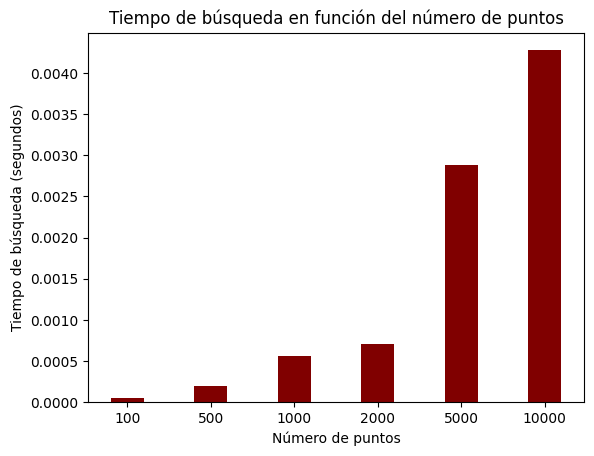

In [29]:
# Función para generar puntos de prueba
def generate_test_points(num_points):
    return [Point3D(random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)) for _ in range(num_points)]

# Función para medir el tiempo de búsqueda
def measure_search_time(tree, x_range, y_range, z_range):
    start_time = time.time()
    query_3d_range(tree, x_range, y_range, z_range)
    end_time = time.time()
    return end_time - start_time

# Pruebas unitarias
num_points_list = [100, 500, 1000, 2000, 5000, 10000]
search_times = []


for num_points in num_points_list:
    points = generate_test_points(num_points)
    root = build_3d_range_tree(points)
    x_range = [1, num_points]
    y_range = [1, num_points]
    z_range = [1, num_points]
    search_time = measure_search_time(root, x_range, y_range, z_range)
    search_times.append(search_time)



# Graficar histograma
num_points_list2 = ["100", "500", "1000", "2000", "5000", "10000"]
plt.bar(num_points_list2, search_times, color ='maroon', width = 0.4)
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo de búsqueda (segundos)')
plt.title('Tiempo de búsqueda en función del número de puntos')
plt.show()

# PUNTO 3

Desarrollar un algoritmo de búsqueda del par de puntos más cercanos, dado un Input de un conjunto de puntos en 3 dimensiones. El output del algoritmo debe ser el par de puntos, realizar pruebas unitarias del algoritmo, verificando desempeño correcto. Este algoritmo no puede basarse en cálculo de distancia sobre todos los posibles pares de puntos en el conjunto Input de complejidad en tiempo O(n2), este algoritmo debe tener una complejidad en tiempo asintótica de menor orden.